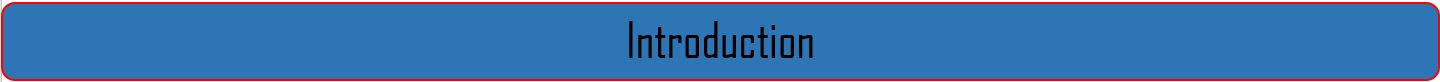

Water quality is the chemical, physical and biological characteristics of water based on standards of use. They are most often used in relation to a set of standards, compliance with which, as a rule, is achieved by water treatment, can be assessed. The most common standards used to monitor and assess water quality reflect the health of ecosystems, the safety of human contact, and the health of drinking water. Water quality has a significant impact on water supply and often determines supply options.
Water quality parameters are determined by the intended use. Water quality work tends to focus on water that is treated for drinking water, industrial/domestic use, or restoration (environment/ecosystem, typically human health/aquatic life).

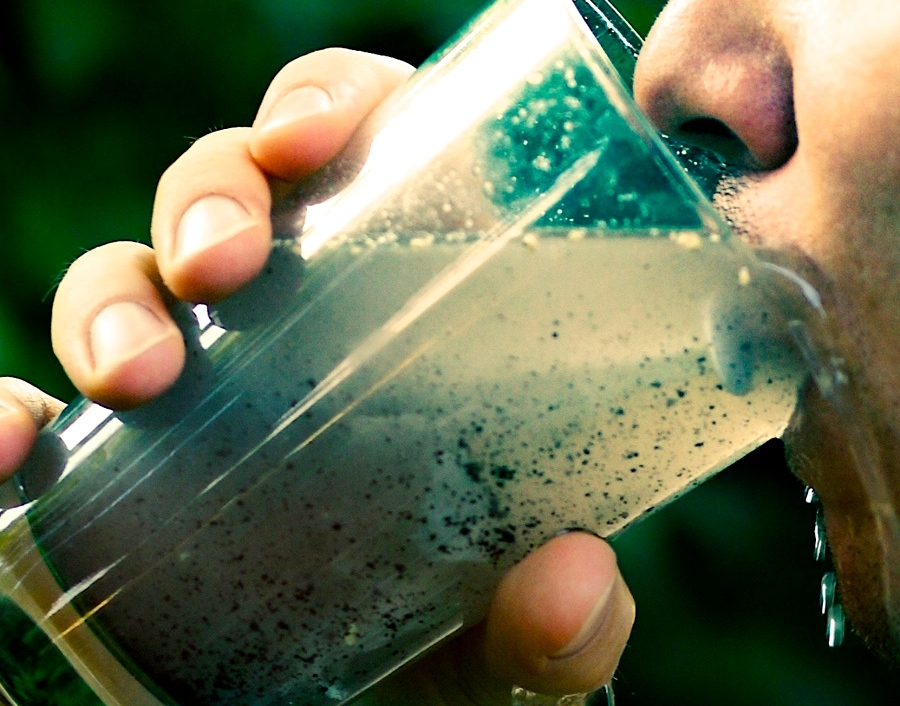

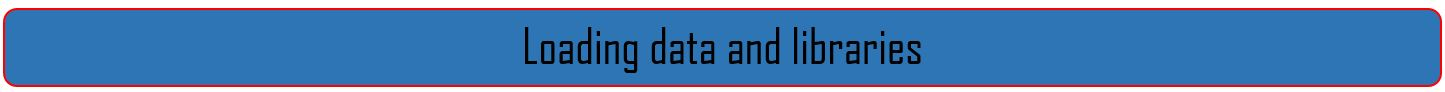

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('../input/water-potability/water_potability.csv')

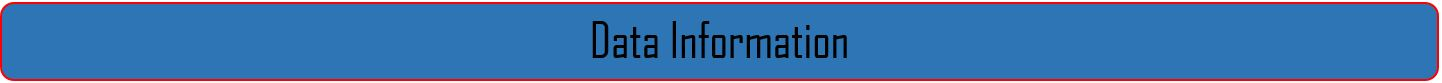

In [3]:
train

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

The dataset contains 3276 rows and 10 columns

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


All features except Potability are fractional.

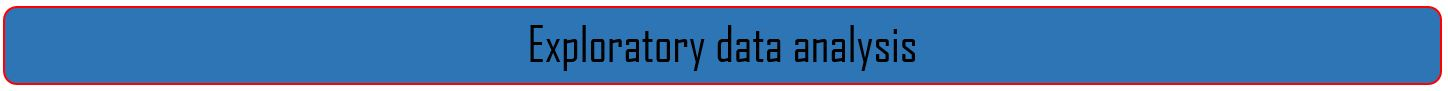

## Let's look at the statistics of the dataset

In [5]:
train.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

There are outliers in the data. We can delete no more than 1-2% of the data, i.e. 30-60 rows.

## Let's look at the missing values in the dataset.

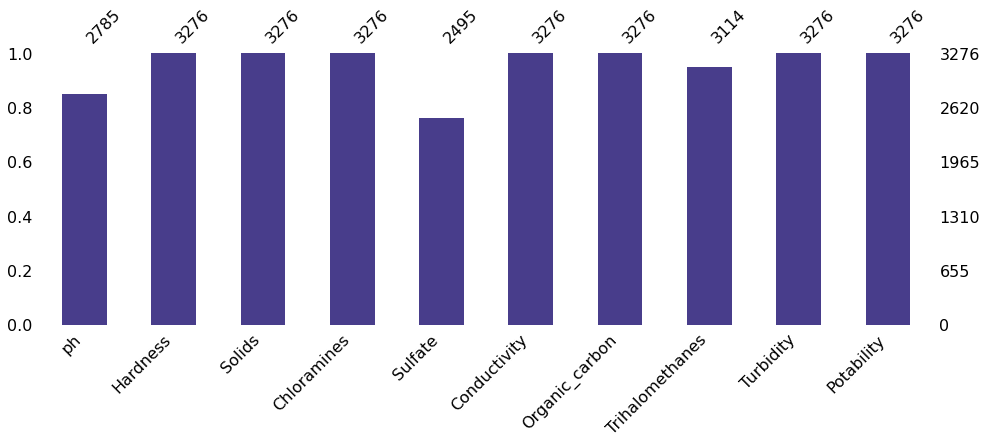

In [6]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

In the future, it is proposed to restore the values of sulfate, ph, trihalomethanes using KNNImputer.

In [7]:
train

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [8]:
train['Index']=range(3276)

## Let's carry out an intermediate correlation analysis

In [9]:
correlation = train.corr()
print(correlation['Potability'].sort_values(ascending = False),'\n')

Potability         1.000000
Index              0.105249
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



Index(['Potability', 'Index', 'Solids', 'Chloramines', 'Trihalomethanes',
       'Turbidity', 'ph', 'Conductivity', 'Hardness', 'Sulfate'],
      dtype='object')


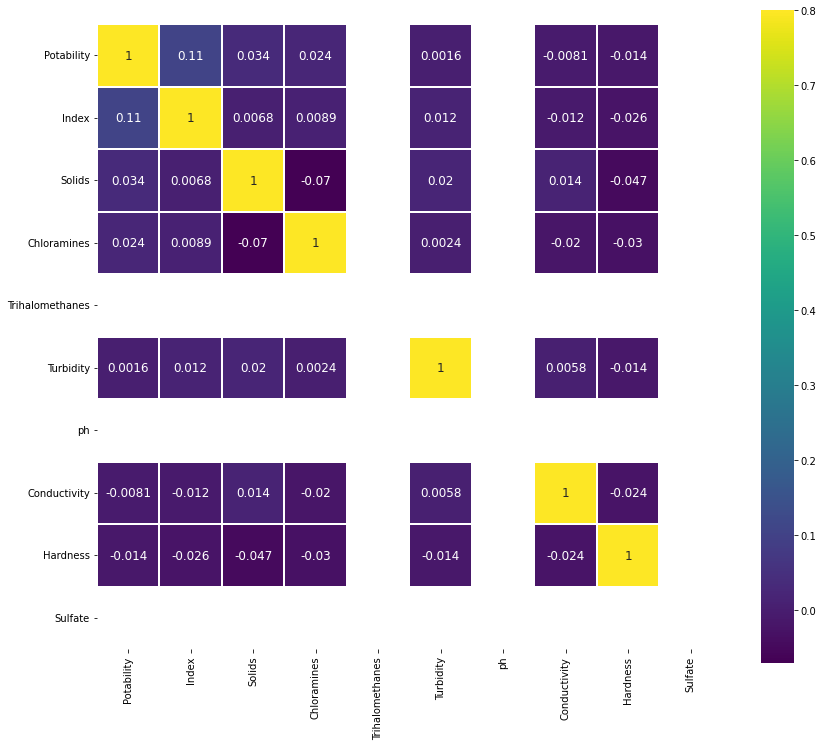

In [10]:
k= 10
cols = correlation.nlargest(k,'Potability')['Potability'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

These water characteristics are independent variables and do not correlate with each other.

## Let's look at the interaction of features with each other.

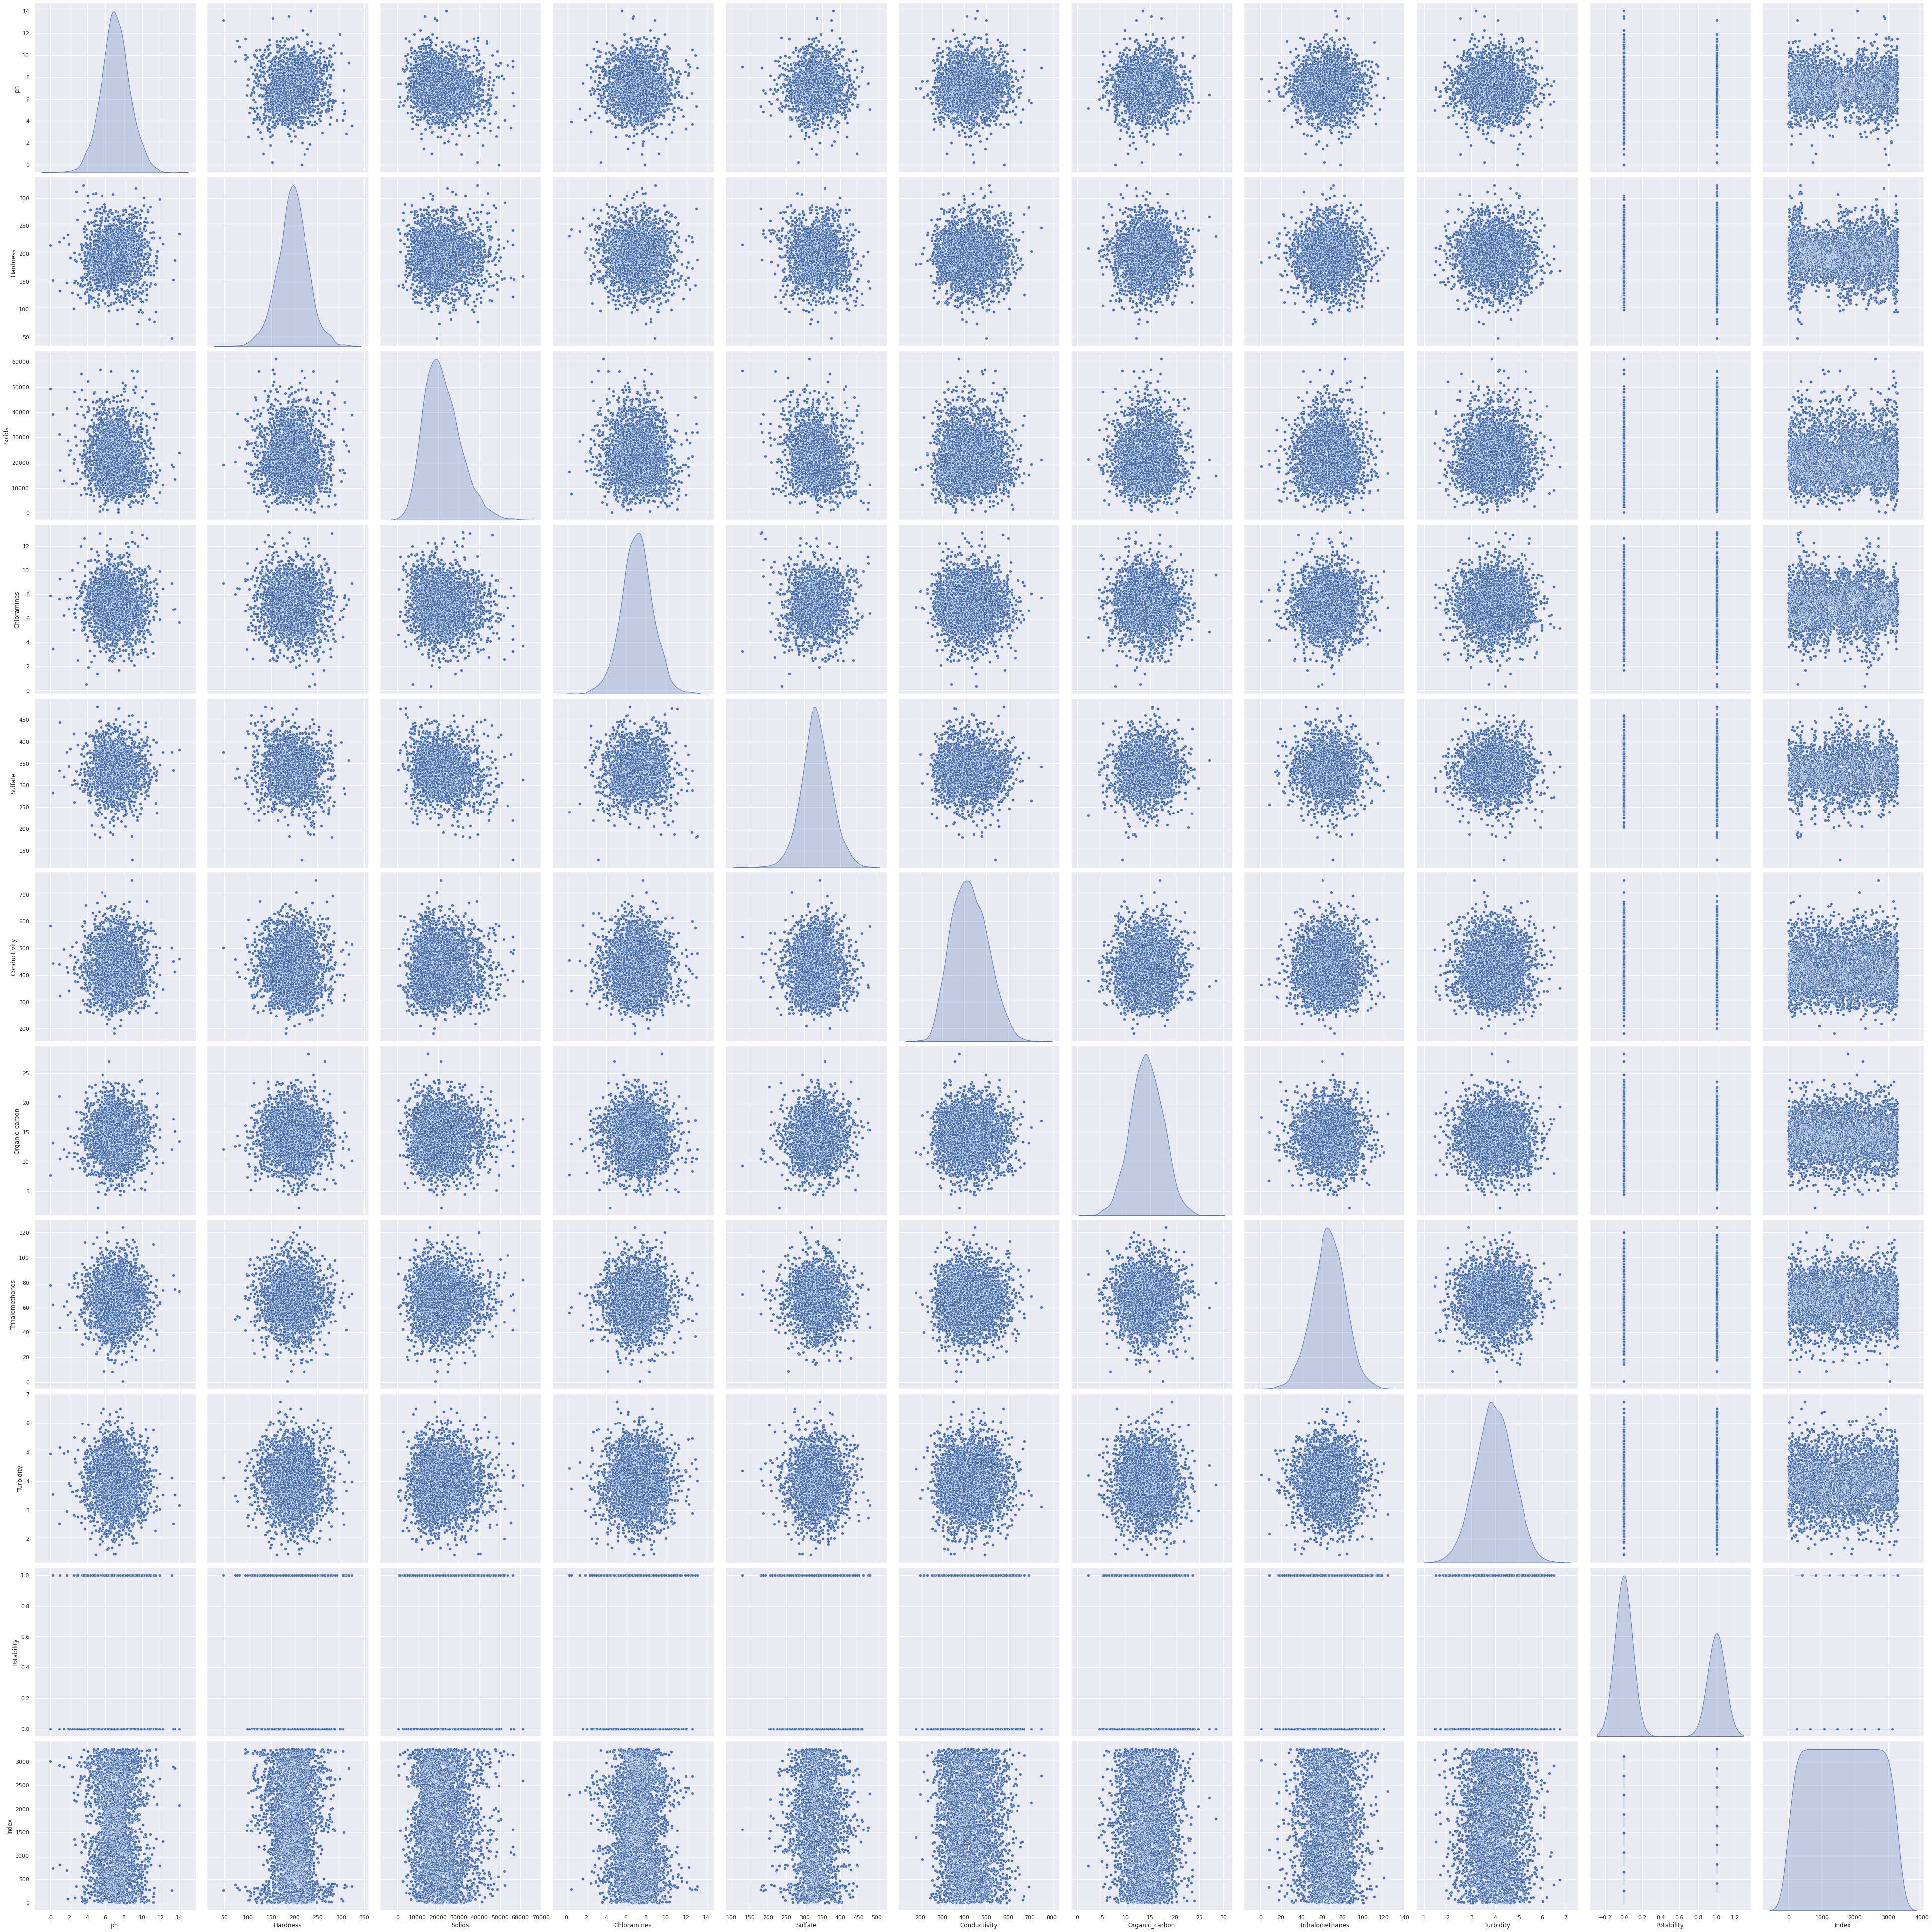

In [11]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

From these graphs, we see that we have an imbalance of classes and there is no clear division into clusters.

## Let's look at outliers in the data.

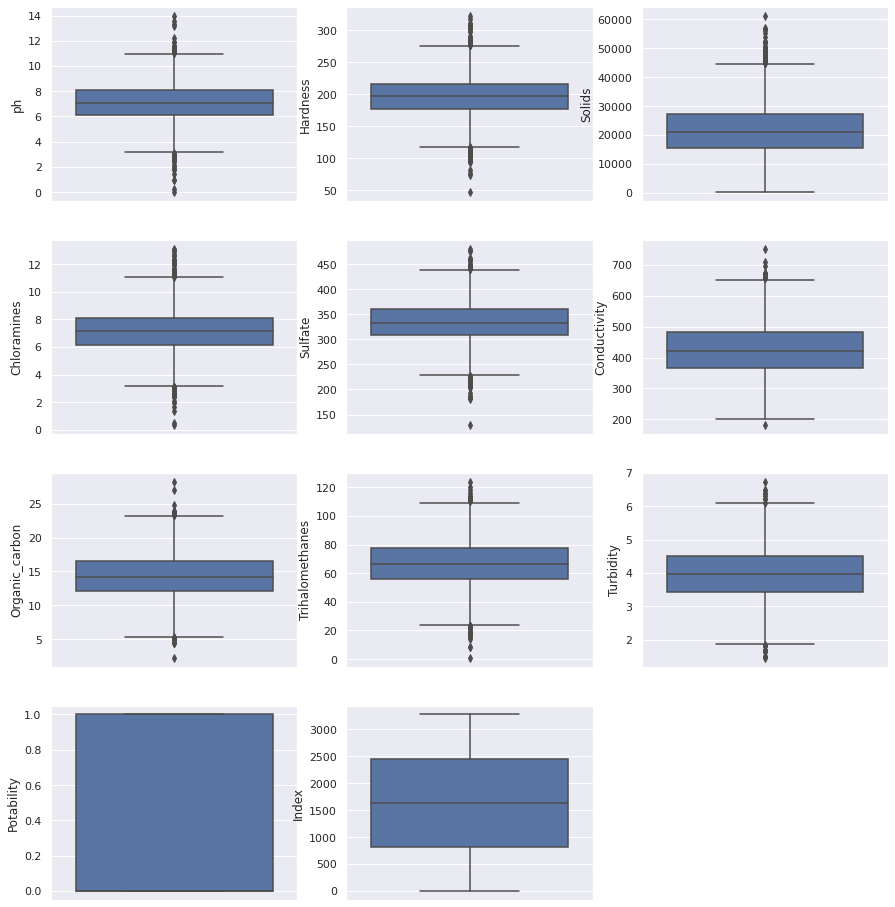

In [12]:
i=1
plt.figure(figsize=(15,25))
for feature in train.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

There are minor outliers in the data. It is proposed to remove them in the future using the smart definition of outliers of the sklearn library.

Let's go back to filling in the missing data. I suggest using the built-in k-nearest neighbors method in the sklearn library.

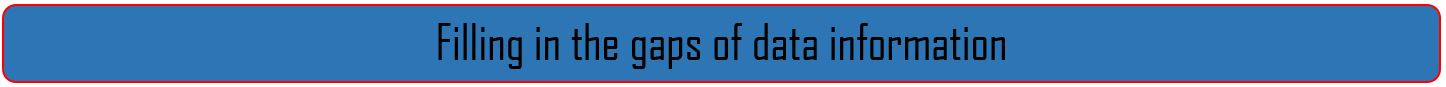

In [13]:
train.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
Index                0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [16]:
l=imputer.fit_transform(train)

In [17]:
train1=pd.DataFrame(l,columns=train.columns)

In [18]:
train1

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.121167  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  317.134699   
2     8.099124  224.236259  19909.541732     9.275884  338.872095   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  343.733113   
3273  9.419510  175.762646  33155.578218     7.350233  321.637757   
3274  5.126763  230.603758  11983.869376     6.303357  340.553644   
3275  7.874671  195.102299  17404.177061     7.509306  341.718924   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135         0.0   
1       592.885359       15.180013        56.329076   4.500656         0.0   
2       418.606213       16.868637        66.420093   3.055934         0.0   
3       363.266516       18.436524       100.341674   4.628771         0.0   
4       398.410813       11.558279        31.997993   4.075075         0.0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821         1.0   
3272    392.449580       19.903225        67.596290   2.798243         1.0   
3273    432.044783       11.039070        69.845400   3.298875         1.0   
3274    402.883113       11.168946        77.488213   4.708658         1.0   
3275    327.459760       16.140368        78.698446   2.309149         1.0   

       Index  
0        0.0  
1        1.0  
2        2.0  
3        3.0  
4        4.0  
...      ...  
3271  3271.0  
3272  3272.0  
3273  3273.0  
3274  3274.0  
3275  3275.0  

[3276 rows x 11 columns]

In [19]:
train1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
Index              0
dtype: int64

The contents of the gaps are filled with the k-nearest neighbors method. Let's move on to smart processing of data outliers. We delete no more than 2% of the data = 60 rows.

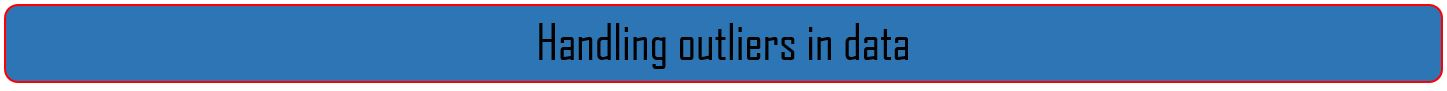

In [20]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(train1) 

In [22]:
train1['Out']=y_pred

In [23]:
Out=train[train1['Out']!=1]

In [24]:
Out.shape

(10, 11)

In [25]:
train1

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.121167  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  317.134699   
2     8.099124  224.236259  19909.541732     9.275884  338.872095   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  343.733113   
3273  9.419510  175.762646  33155.578218     7.350233  321.637757   
3274  5.126763  230.603758  11983.869376     6.303357  340.553644   
3275  7.874671  195.102299  17404.177061     7.509306  341.718924   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135         0.0   
1       592.885359       15.180013        56.329076   4.500656         0.0   
2       418.606213       16.868637        66.420093   3.055934         0.0   
3       363.266516       18.436524       100.341674   4.628771         0.0   
4       398.410813       11.558279        31.997993   4.075075         0.0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821         1.0   
3272    392.449580       19.903225        67.596290   2.798243         1.0   
3273    432.044783       11.039070        69.845400   3.298875         1.0   
3274    402.883113       11.168946        77.488213   4.708658         1.0   
3275    327.459760       16.140368        78.698446   2.309149         1.0   

       Index  Out  
0        0.0    1  
1        1.0    1  
2        2.0    1  
3        3.0    1  
4        4.0    1  
...      ...  ...  
3271  3271.0    1  
3272  3272.0    1  
3273  3273.0    1  
3274  3274.0    1  
3275  3275.0    1  

[3276 rows x 12 columns]

In [26]:
train2=train1[train1['Out']==1]

In [27]:
train2

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.121167  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  317.134699   
2     8.099124  224.236259  19909.541732     9.275884  338.872095   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  343.733113   
3273  9.419510  175.762646  33155.578218     7.350233  321.637757   
3274  5.126763  230.603758  11983.869376     6.303357  340.553644   
3275  7.874671  195.102299  17404.177061     7.509306  341.718924   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135         0.0   
1       592.885359       15.180013        56.329076   4.500656         0.0   
2       418.606213       16.868637        66.420093   3.055934         0.0   
3       363.266516       18.436524       100.341674   4.628771         0.0   
4       398.410813       11.558279        31.997993   4.075075         0.0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821         1.0   
3272    392.449580       19.903225        67.596290   2.798243         1.0   
3273    432.044783       11.039070        69.845400   3.298875         1.0   
3274    402.883113       11.168946        77.488213   4.708658         1.0   
3275    327.459760       16.140368        78.698446   2.309149         1.0   

       Index  Out  
0        0.0    1  
1        1.0    1  
2        2.0    1  
3        3.0    1  
4        4.0    1  
...      ...  ...  
3271  3271.0    1  
3272  3272.0    1  
3273  3273.0    1  
3274  3274.0    1  
3275  3275.0    1  

[3266 rows x 12 columns]

In [28]:
train2=train2.drop('Out',axis=1)

Let's look again at the distribution of the target variable.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Potability', ylabel='count'>

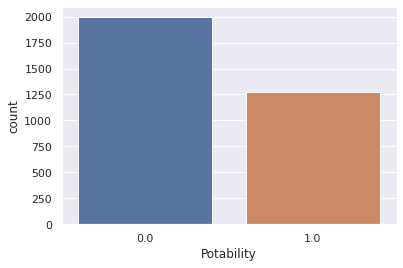

In [29]:
sns.countplot(train2.Potability)

There is a clear class imbalance. It is proposed to create artificial duplicates to eliminate this effect.

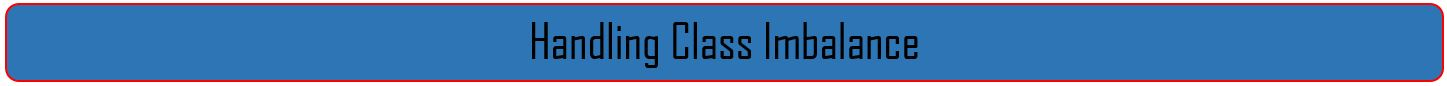

In [30]:
from imblearn.over_sampling import SMOTE 

In [31]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(train2.drop(["Potability"],axis=1),train2["Potability"])

To increase the accuracy of forecasting, I propose to normalize the data within [0,1]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.508655  0.571139  0.362007     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.323786     0.491839  0.534427      0.719411   
2  0.578509  0.641311  0.346413     0.698543  0.596176      0.414652   
3  0.594055  0.605536  0.383707     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.312272     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity     Index  
0        0.313402         0.699753   0.286091  0.000000  
1        0.497319         0.450999   0.576793  0.000305  
2        0.562017         0.532866   0.303637  0.000611  
3        0.622089         0.808065   0.601015  0.000916  
4        0.358555         0.253606   0.496327  0.001221

Let's proceed to the selection of the optimal machine learning algorithm. To do this, we divide the data into training and test sets, and also create simple pipelines of classification models.

In [34]:
scaled_df=scaled_df.drop('Index',axis=1)

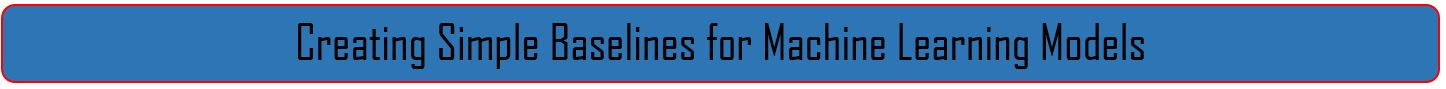

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [36]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [37]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       643
         1.0       0.70      0.68      0.69       674

    accuracy                           0.68      1317
   macro avg       0.68      0.68      0.68      1317
weighted avg       0.68      0.68      0.68      1317

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.60      0.54      0.57       643
         1.0       0.60      0.66      0.63       674

    accuracy                           0.60      1317
   macro avg       0.60      0.60      0.60      1317
weighted avg       0.60      0.60      0.60      1317

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64       643
         1.0       0.65      0.65      0.65       674

    accuracy                           0.

The RFC does a better job of defining a class. Let's find the optimal hyperparameters of the model using the optuna library.

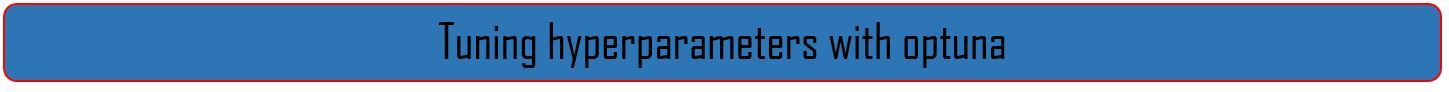

In [38]:
!pip install optuna

In [39]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [40]:
def objective(trial: Trial,X,y) -> float:
    
    param = {
            'n_estimators' : trial.suggest_int("n_estimators",100,1500),
            'max_features' : trial.suggest_categorical("max_features",["auto","sqrt"]),
            'max_depth' : trial.suggest_int("max_depth",5,80,log = True),
            'min_samples_split' : trial.suggest_int("min_samples_split",2,15),
            'min_samples_leaf' : trial.suggest_int("min_samples_leaf",1,9),
            'bootstrap' : trial.suggest_categorical("bootstrap",[True,False])
            }
    
    model = RandomForestClassifier(**param)
    
    return cross_val_score(model, X, y, cv=5).mean()

In [41]:
#study = optuna.create_study(direction='maximize',sampler=TPESampler())
#study.optimize(lambda trial : objective(trial,X_train,y_train),n_trials= 50)

In [42]:
#print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

We choose the best model for cross-validation with the given parameters.

In [43]:
clf=RandomForestClassifier()
parametres={'n_estimators': [996], 'max_features': ['auto'], 'max_depth': [49], 'min_samples_split': [7], 'min_samples_leaf': [1], 'bootstrap': [True]}
grid_search_cv_clf=GridSearchCV(clf,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf2=grid_search_cv_clf.best_estimator_
y_pred2=best_clf2.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       643
         1.0       0.69      0.67      0.68       674

    accuracy                           0.68      1317
   macro avg       0.68      0.68      0.68      1317
weighted avg       0.68      0.68      0.68      1317



A simple baseline turned out to be better, but when using the optuna, the evaluation was carried out on cross-validation, so this model will definitely not have retraining :))

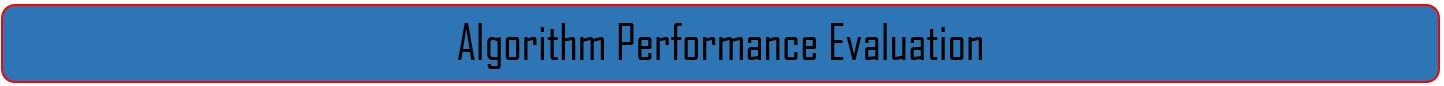

Let's build an error matrix

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

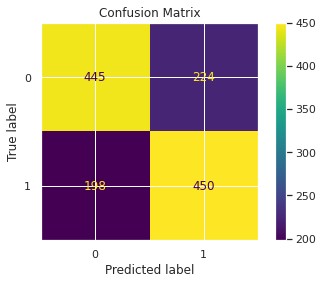

In [45]:
cm = confusion_matrix(best_clf2.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Let's analyze the important features.

In [46]:
feature_importances=best_clf2.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
4          Sulfate             0.138322
0               ph             0.133831
2           Solids             0.119246
1         Hardness             0.113657
3      Chloramines             0.112557
6   Organic_carbon             0.103943
8        Turbidity             0.095245
7  Trihalomethanes             0.092848
5     Conductivity             0.090351

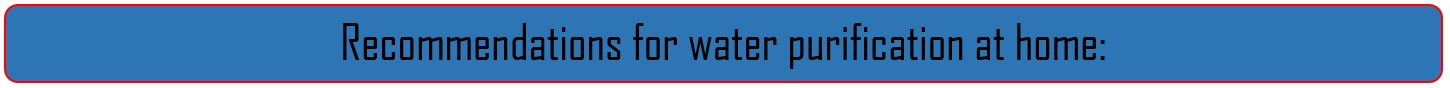


* Settling. It's probably impossible to find something easier. It helps a lot to remove excess chlorine from the water, although not completely. Water must be poured into a vessel without a lid, left in it for 7 hours. First, volatile gases will evaporate from such water, then salts of heavy metals will precipitate. And now, after settling, you can pour about ¾ already into a new vessel without shaking. The rest is just poured out.
* Boiling. Also a characteristic cleaning method. To make the water purified, it is boiled over low heat for an hour. Only before this, the water must be defended, because if chlorine is present in the water, when boiled, it will become a very harmful carcinogen. And the boiling method cannot be the main one, since, alas, it increases the concentration of salts of heavy metals.
* Acid cleaning. For example, half a gram of ascorbic acid per 5 liters of water - that's the whole recipe for high-quality cleaning. The acid will work for about an hour. But this method is also often criticized, therefore, it may not be worth adding it to the list of the most used ones.
* Activated carbon. This component is often used as a sorbent in industrial filters. Charcoal tablets can also be used at home. Several pieces should be wrapped in gauze, put on the bottom of the container with liquid. It will take about half a day to clean up. Coal perfectly absorbs chlorine, helps to restore the neutrality of water with respect to odors.
* Apply filters. Ready-made industrial filters are, of course, the most comfortable option. Even ordinary meshes, which easily trap foreign particles, are already something. Very attractive filters with a nozzle on the faucet. Some of them are such models that pass ordinary water through the tap, there are those that direct the flow into the filter itself, and in this way they purify drinking water. Pitcher filters are also convenient, but their volume, unlike the previous ones, is limited. True, they are mobile, and this is their forte.
